In [49]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv("C:/Users/Mayur/Downloads/archive/netflix_titles.csv", encoding='ISO-8859-1')
print(data.head)

<bound method NDFrame.head of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   
8807   s8808  TV Show     Parasyte: The Grey     Yeon Sang-ho   
8808   s8809    Movie                 Serena     Susanne Bier   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabal

In [50]:
print(data.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64


In [51]:
data = data[["title", "description", "type", "genre"]]
print(data.head())

                   title                                        description  \
0   Dick Johnson Is Dead  As her father nears the end of his life, filmm...   
1          Blood & Water  After crossing paths at a party, a Cape Town t...   
2              Ganglands  To protect his family from a powerful drug lor...   
3  Jailbirds New Orleans  Feuds, flirtations and toilet talk go down amo...   
4           Kota Factory  In a city of coaching centers known to train I...   

      type                                              genre  
0    Movie                                      Documentaries  
1  TV Show    International TV Shows, TV Dramas, TV Mysteries  
2  TV Show  Crime TV Shows, International TV Shows, TV Act...  
3  TV Show                             Docuseries, Reality TV  
4  TV Show  International TV Shows, Romantic TV Shows, TV ...  


In [52]:
data = data.dropna()

In [46]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["genre"] = data["genre"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
print(data.genre.sample(10))

4842                  drama independ movi
5417                     drama lgbtq movi
2787                     kid tv tv comedi
1449                           realiti tv
8732              scifi  fantasi thriller
5742             comedi drama intern movi
943     action  adventur drama sport movi
8436             classic movi documentari
2608                          documentari
4450                       standup comedi
Name: genre, dtype: object


In [53]:
feature = data["genre"].tolist()
tfidf = text.TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

In [54]:
indices = pd.Series(data.index, 
                    index=data['title']).drop_duplicates()

In [57]:
def netflix_recommendation(title, similarity = similarity):
    index = indices[title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    movieindices = [i[0] for i in similarity_scores]
    return data['title'].iloc[movieindices]
print(netflix_recommendation("Jaws"))

41                      Jaws
1251      Dances with Wolves
2373                 Saladin
6030        A Bridge Too Far
6358        Bonnie and Clyde
7530    Mutiny on the Bounty
7751                 Platoon
7879                   Rocky
8127                Superfly
177     The Guns of Navarone
Name: title, dtype: object


C:\Users\Mayur\PycharmProjects\pythonPractice\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mayur\PycharmProjects\pythonPractice\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mayur\PycharmProjects\pythonPractice\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mayur\PycharmProjects\pythonPractice\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mayur\PycharmProjects\pythonPractice\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 156 (\x9c) missing from font(s) DejaVu Sans.
  

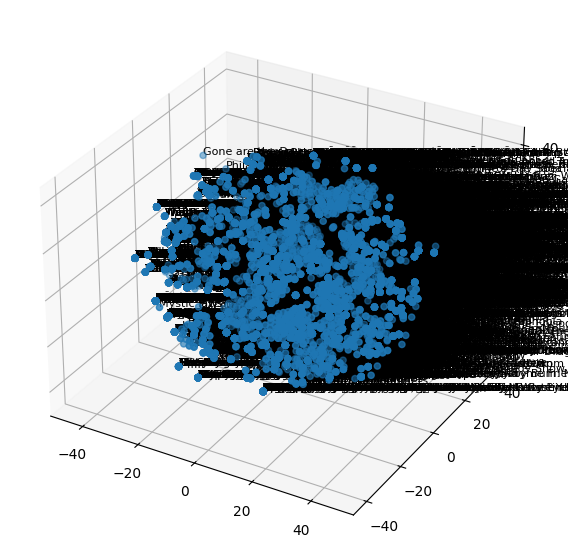

In [59]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Use t-SNE to reduce the dimensionality of the TF-IDF matrix to 3 dimensions
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

# Plot the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2])

# Annotate the plot with movie titles
for i in range(len(data)):
    ax.text(tsne_result[i, 0], tsne_result[i, 1], tsne_result[i, 2], data['title'].iloc[i], size=8, zorder=1, color='k')

plt.show()